In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.utils import shuffle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [23]:
file_path = '/content/sample_data/images'
all_images = []
all_labels = []
file  = os.listdir(file_path)
file.remove('.ipynb_checkpoints')
for subfolder in sorted(file, key=lambda x: int(x[1:])):
  sub_images = []
  all_labels.append(subfolder)
  image_path = os.path.join(file_path,subfolder)
  for img_path in sorted(os.listdir(image_path)):
    img = Image.open(os.path.join(image_path,img_path))
    img = img.convert("L")
    img_array = np.array(img, dtype=np.float32).flatten()
    sub_images.append(img_array)
  all_images.append(sub_images)
print(all_images)
print(all_labels)
import random

for sub_images in all_images:
    random.shuffle(sub_images)


[[array([48., 49., 45., ..., 47., 46., 46.], dtype=float32), array([34., 34., 33., ..., 37., 40., 33.], dtype=float32), array([60., 60., 62., ..., 32., 34., 34.], dtype=float32), array([39., 44., 53., ..., 29., 26., 29.], dtype=float32), array([63., 53., 35., ..., 41., 10., 24.], dtype=float32), array([64., 76., 80., ..., 35., 37., 39.], dtype=float32), array([ 43.,  50.,  41., ..., 158., 153., 169.], dtype=float32), array([41., 47., 47., ..., 35., 37., 38.], dtype=float32), array([44., 43., 32., ..., 43., 43., 37.], dtype=float32), array([42., 41., 44., ..., 42., 43., 41.], dtype=float32)], [array([ 35.,  36.,  37., ..., 144., 147., 143.], dtype=float32), array([ 37.,  34.,  38., ..., 135., 143., 133.], dtype=float32), array([37., 35., 35., ..., 26., 28., 28.], dtype=float32), array([30., 37., 35., ..., 26., 27., 32.], dtype=float32), array([34., 36., 35., ..., 32., 25., 25.], dtype=float32), array([35., 32., 36., ..., 25., 28., 29.], dtype=float32), array([34., 35., 35., ..., 31., 24

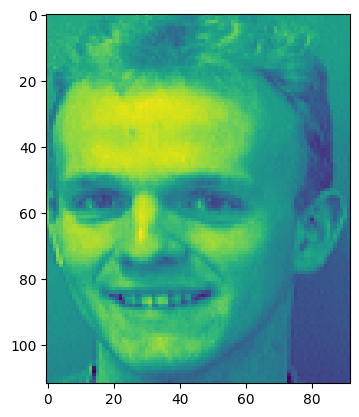

In [10]:
img_path = '/content/sample_data/images/s5/1.pgm'
img= Image.open(img_path)
plt.imshow(img)

In [24]:
# Implementing the K-fold validaion
def perform_fold_operations_with_visualization(all_images, fold_index):
    train_images, test_images = [], []
    train_labels, test_labels = [], []

    for label, subject_images in enumerate(all_images):
        start_index = 2 * fold_index
        end_index = start_index + 2

        test_imgs = subject_images[start_index:end_index]
        train_imgs = subject_images[:start_index] + subject_images[end_index:]
        train_images.extend(train_imgs)
        test_images.extend(test_imgs)
        train_labels.extend([label+1] * len(train_imgs))
        test_labels.extend([label+1] * len(test_imgs))

    train_images = np.array(train_images).reshape(len(train_images), -1)
    test_images = np.array(test_images).reshape(len(test_images), -1)

    pca = PCA(n_components=50)
    train_images_pca = pca.fit_transform(train_images)
    test_images_pca = pca.transform(test_images)

    model = LogisticRegression(max_iter=1000)
    model.fit(train_images_pca, train_labels)

    predictions = model.predict(test_images_pca)
    accuracy = accuracy_score(test_labels, predictions)

    return accuracy, test_images, test_labels, predictions

In [25]:


# Main K-Fold Cross-Validation process for k=5
k = 5
fold_accuracies = []
for fold_index in range(k):
    accuracy, test_images_fold, test_labels_fold, predictions_fold = perform_fold_operations_with_visualization(all_images, fold_index)
    fold_accuracies.append(accuracy)

    if fold_index == 0:
        first_fold_test_images = test_images_fold
        first_fold_test_labels = test_labels_fold
        first_fold_predictions = predictions_fold

average_accuracy = np.mean(fold_accuracies)

average_accuracy, fold_accuracies, first_fold_test_images, first_fold_test_labels, first_fold_predictions
print(fold_accuracies)
print(fold_accuracies)
print(average_accuracy)
print(first_fold_predictions)
#visualize_images(first_fold_test_images,first_fold_test_labels,5)

[0.975, 0.9875, 0.975, 1.0, 0.975]
[0.975, 0.9875, 0.975, 1.0, 0.975]
0.9824999999999999
[ 1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10  8 11 11 12 12
 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
 25 25 26 26 27 27 28 37 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36
 37 37 38 38 39 39 40 40]


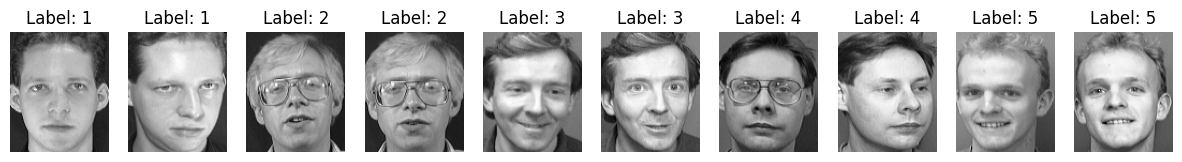

In [ ]:
visualize_images(test_images,test_labels,10)

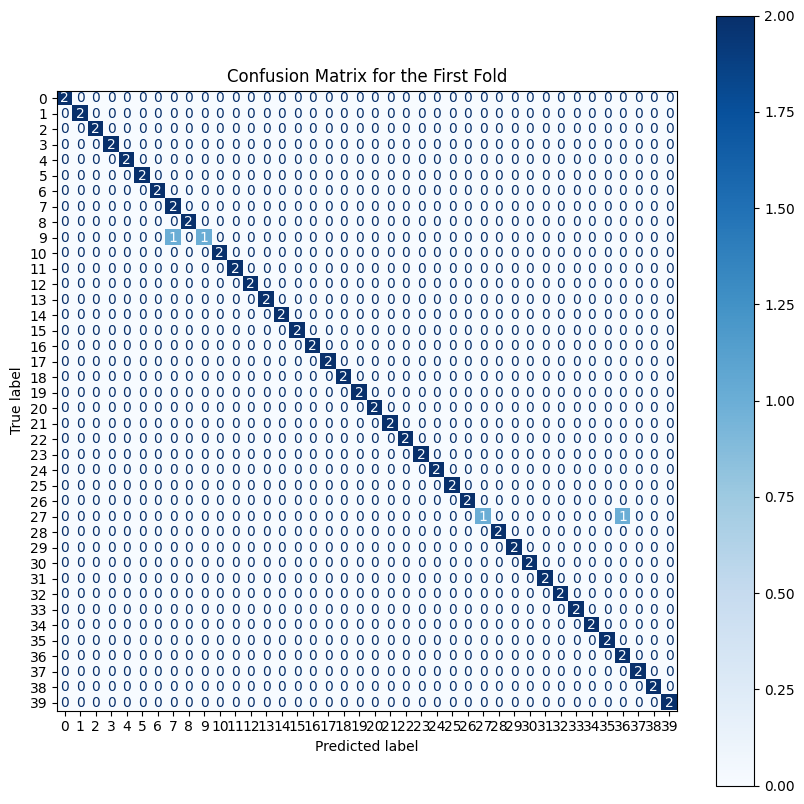

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(first_fold_test_labels, first_fold_predictions)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for the First Fold')
plt.show()


In [27]:
import matplotlib.pyplot as plt

def visualize_images(images, labels, num_images=5):

    plt.figure(figsize=(15, 3))

    for i in range(num_images):

        img_shape = (112, 92)
        image = images[i].reshape(img_shape)

        # Plotting
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()




